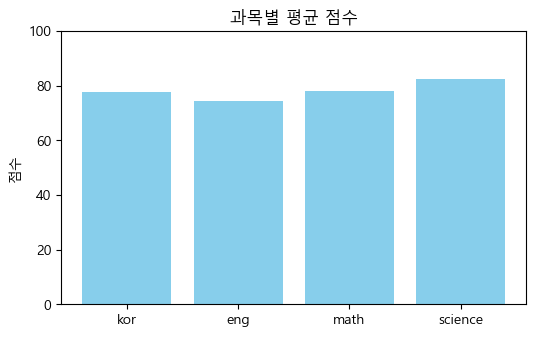

In [3]:
import tkinter as tk
from tkinter import ttk
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# MongoDB 연결
client = MongoClient("mongodb://localhost:27017")
db = client["testdb"]
collection = db["students_csv"]

# 데이터 불러오기
df = pd.DataFrame(list(collection.find({},{"_id": 0})))

# Tkinter 메인 윈도우
root = tk.Tk()
root.title("학생 점수 대시보드")
root.geometry("900x700")

# === 제목 ===
title_label = tk.Label(root, text="학생 점수 대시보드", font=("Malgun Gothic", 18, "bold"))
title_label.pack(pady=10)

# === Treeview 테이블 ===
frame_table = tk.Frame(root)
frame_table.pack(pady=10)

columns = list(df.columns)
tree = ttk.Treeview(frame_table, columns=columns, show="headings", height=10)

# 컬럼 헤더 설정
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=100, anchor="center")

# 데이터 삽입
for _, row in df.iterrows():
    tree.insert("", "end", values=list(row))

tree.pack()

# === Matplotlib 그래프 표시 ===
frame_graph = tk.Frame(root)
frame_graph.pack(pady=20)

# 과목별 평균 계산
mean_scores = df[["kor", "eng", "math", "science"]].mean()

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(mean_scores.index, mean_scores.values, color="skyblue")
ax.set_title("과목별 평균 점수")
ax.set_ylabel("점수")
ax.set_ylim(0, 100)

# Tkinter에 matplotlib 그래프 추가
canvas = FigureCanvasTkAgg(fig, master=frame_graph)
canvas.draw()
canvas.get_tk_widget().pack()

# === 종료 버튼 ===
exit_button = tk.Button(root, text="닫기", command=root.destroy, font=("Malgun Gothic", 12))
exit_button.pack(pady=10)

# Tkinter 실행
root.mainloop()